In [ ]:
from sklearn import datasets
import numpy as np

# Charger le jeu de données Iris
irisData = datasets.load_iris()

# Afficher le nombre d'occurrences de chaque classe
nbr_donnes = np.bincount(irisData.target)
print("Nombre d'occurrences de chaque classe :")
print(nbr_donnes)

# Attributs et classe du 32ème élément
attributes_of_32nd_instance = irisData.data[31]
class_of_32nd_instance = irisData.target[31]

print("\nAttributs du 32e élément :")
print(attributes_of_32nd_instance)

print("\nClasse du 32e élément :", class_of_32nd_instance)

Nombre d'occurrences de chaque classe :
[50 50 50]

Attributs du 32e élément :
[5.4 3.4 1.5 0.4]

Classe du 32e élément : 0


irisData.data: C'est un tableau où chaque ligne représente une fleur et chaque colonne représente une caractéristique de la fleur .
irisData.target: C'est un tableau où chaque élément représente la classe de la fleur correspondante dans irisData.data.

In [ ]:
import matplotlib
import pylab as pl
from itertools import cycle  # Ajout pour utiliser 'cycle'

def plot_2D(data, target, target_names):
    # Cycle de couleurs pour différencier les classes
    colors = cycle('rgbcmykw')

    # Identifiants de cible pour chaque classe
    target_ids = range(len(target_names))

    # Création d'une nouvelle figure
    pl.figure()

    # Boucle sur les classes pour afficher les points
    for i, c, label in zip(target_ids, colors, target_names):
        # Utilisation de scatter pour afficher les points
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)

    # Ajout de la légende
    pl.legend()

    # Affichage du graphique
    pl.show()


b)

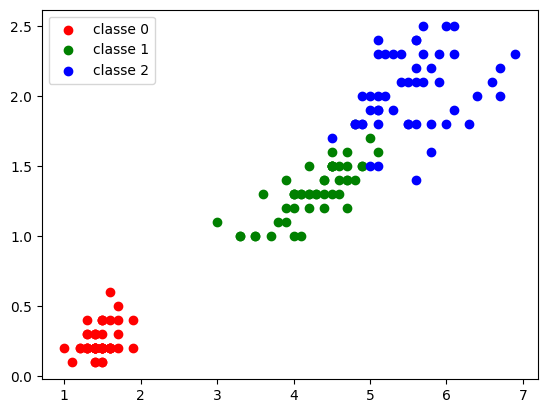

In [ ]:
plot_2D(irisData.data , irisData.target, ['classe 0','classe 1','classe 2'])

c)

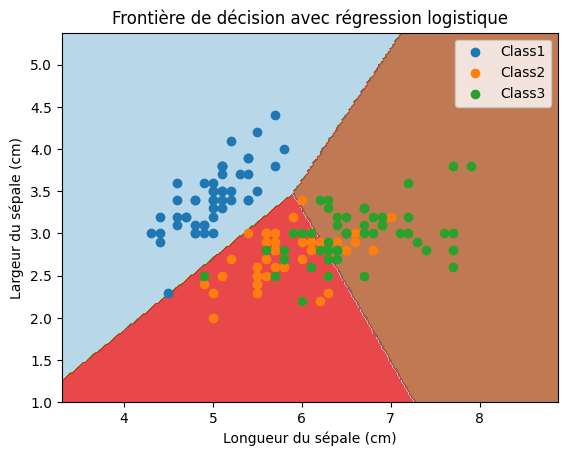

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

def plot_decision_boundary(X, y, model, feature_names, target_names, title):
    h = .02  # pas du maillage

    # Créer une grille pour les points du graphique
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Entraîner le modèle
    model.fit(X, y)

    # Prédire les classes pour chaque point dans la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Afficher le contour de la décision
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Afficher les points de données
    for i, target_name in enumerate(target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()

# Charger le jeu de données Iris
irisData = datasets.load_iris()

# Utiliser toutes les caractéristiques (colonnes) pour la visualisation
plot_decision_boundary(irisData.data[:, :2], irisData.target, LogisticRegression(), ['Longueur du sépale (cm)','Largeur du sépale (cm)'], ['Class1', 'Class2', 'Class3'], 'Frontière de décision avec régression logistique')


II-2) a)

In [ ]:
# Importer la classe MultinomialNB du module naive_bayes de scikit-learn
from sklearn import naive_bayes

# Créer une instance de l'algorithme de classification Multinomial Naive Bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
# Charger le jeu de données Iris
irisData = datasets.load_iris()
# Entraîner le modèle Multinomial Naive Bayes avec une partie des données
# Utilisation des données sauf la dernière observation pour l'entraînement
nb.fit(irisData.data[:-1], irisData.target[:-1])

# Prédire la classe de la 32e observation dans le jeu de données
p31 = nb.predict(irisData.data[31].reshape(1, -1))
print(p31)

# Prédire la classe de la dernière observation dans le jeu de données
plast = nb.predict(irisData.data[-1].reshape(1, -1))
print(plast)

# Prédire les classes pour l'ensemble du jeu de données
p = nb.predict(irisData.data[:])
print(p)


[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


2)b)

In [ ]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

Les résultats semblent incohérents car le modèle a été entraîné uniquement sur les 99 premières instances, et maintenant, il est testé sur les instances suivantes. Idéalement, l'ensemble d'apprentissage devrait contenir un échantillon représentatif de toutes les classes du jeu de données.

III-2)

In [ ]:
Y = irisData.target
P=nb.predict(irisData.data)
ea = 0
for i in range(len(irisData.data)):
  if (P[i] != Y[i]):
    ea = ea+1
print (ea /len(irisData.data))

0.3333333333333333


In [ ]:
Z=P-Y
print(np.count_nonzero(Z))

50


 le nombre d'éléments non nuls dans ce tableau Z correspond au nombre d'erreurs

3)

In [ ]:
# Méthode 1 : Utiliser une boucle for
ea_method1 = 0
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea_method1 += 1
error_rate_method1 = ea_method1 / len(irisData.data)
print("Méthode 1 - Taux d'erreur apparente :", error_rate_method1)

# Méthode 2 : Utiliser des opérations sur les tableaux et matrices avec NumPy
errors_method2 = np.count_nonzero(P != Y)
error_rate_method2 = errors_method2 / len(irisData.data)
print("Méthode 2 - Taux d'erreur apparente :", error_rate_method2)

# Méthode 3 : Utiliser la méthode clf.score(X, y)
accuracy_method3 = nb.score(irisData.data, irisData.target)
error_rate_method3 = 1 - accuracy_method3
print("Méthode 3 - Taux d'erreur apparente :", error_rate_method3)


Méthode 1 - Taux d'erreur apparente : 0.3333333333333333
Méthode 2 - Taux d'erreur apparente : 0.3333333333333333
Méthode 3 - Taux d'erreur apparente : 0.33333333333333337


2)1)a)

In [ ]:
import numpy as np
from sklearn import datasets

def split(S):
    # Obtenir le nombre total d'échantillons dans S
    total_samples = len(S.data)

    # Calculer les tailles de S1 et S2
    size_S1 = int(2 * total_samples / 3)
    size_S2 = total_samples - size_S1

    # Indices aléatoires pour sélectionner les échantillons
    indices = np.random.permutation(total_samples)

    # Sélectionner les indices pour S1 et S2
    indices_S1 = indices[:size_S1]
    indices_S2 = indices[size_S1:]

    # Créer les parties S1 et S2
    dataS1, targetS1 = S.data[indices_S1], S.target[indices_S1]
    dataS2, targetS2 = S.data[indices_S2], S.target[indices_S2]

    return dataS1, targetS1, dataS2, targetS2

# Charger le jeu de données Iris
irisData = datasets.load_iris()

# Utiliser la fonction split pour diviser l'échantillon en S1 et S2
dataS1, targetS1, dataS2, targetS2 = split(irisData)

# Afficher les tailles de S1 et S2
print("Taille de S1 :", len(dataS1))
print("Taille de S2 :", len(dataS2))


Taille de S1 : 100
Taille de S2 : 50


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes

def test(S, clf):
    # Séparer l'échantillon S en deux parties
    train_data, train_target, test_data, test_target  = split(S)

    # Apprendre un modèle avec l'estimateur clf sur la première partie
    clf.fit(train_data, train_target)

    # Tester le modèle sur l'autre partie et calculer les erreurs
    predictions = clf.predict(test_data)
    error_rate = sum(predictions != test_target) / len(test_target)

    return error_rate

error_rate_test = test(irisData, nb)
print(error_rate_test)

0.14


L'erreur estimée sur l'échantillon de test peut être plus petite, égale ou plus grande que l'erreur apparente précédemment calculée. Cela dépend de la manière dont les données sont divisées entre l'échantillon d'apprentissage (S1) et l'échantillon de test (S2). La variabilité dans la division des données peut entraîner des estimations différentes à chaque exécution

2)1)c

In [ ]:
def average_error(t, S, clf):
    error_rates = []

    for _ in range(20):
        # Réaliser t fois le test et stocker les erreurs
        errors = [test(S, clf) for _ in range(t)]
        # Calculer l'erreur moyenne pour t
        average_error_t = sum(errors) / t
        error_rates.append(average_error_t)

    # Calculer l'erreur moyenne des moyennes obtenues pour chaque t
    overall_average_error = sum(error_rates) / 20

    return overall_average_error
# Pour chaque t, calculer l'erreur moyenne sur t et répéter l'expérience 20 fois
for t in [10, 50, 100, 200, 500, 1000]:
    average_error_t = average_error(t,irisData, nb)
    print(f"Erreur moyenne pour t={t} sur 20 répétitions :", average_error_t)

Erreur moyenne pour t=10 sur 20 répétitions : 0.19880000000000003
Erreur moyenne pour t=50 sur 20 répétitions : 0.19925999999999994
Erreur moyenne pour t=100 sur 20 répétitions : 0.19790999999999992
Erreur moyenne pour t=200 sur 20 répétitions : 0.20044499999999993
Erreur moyenne pour t=500 sur 20 répétitions : 0.2017640000000002
Erreur moyenne pour t=1000 sur 20 répétitions : 0.20185900000000015


Les résultats indiquent généralement une stabilité dans l'erreur moyenne pour différentes nombre de test. La variation observée d'une répétition à l'autre est relativement faible, cette stabilité renforce la fiabilité des évaluations de performance du modèle, même avec un nombre limité d'itérations.


d) Oui, la réduction de la taille de l'échantillon de test à 10% par rapport à une proportion de 1/3 peut entraîner une variabilité plus élevée dans l'estimation de l'erreur.

e)

In [ ]:
from sklearn.model_selection import train_test_split
# Tester la fonction train_test_split avec différentes valeurs de test_size
test_sizes = [0.2, 0.25, 0.33, 0.4]

for test_size in test_sizes:
    # Diviser l'échantillon en ensembles d'apprentissage et de test
    D_train, D_test, C_train, C_test = train_test_split(irisData.data, irisData.target, test_size=test_size, random_state=42)
    # Entraîner le modèle sur l'ensemble d'apprentissage
    nb.fit(D_train, C_train)
    # Évaluer l'erreur sur l'ensemble de test
    error = 1 - nb.score(D_test, C_test)

    print(f"Test Size: {test_size}, Erreur Réelle: {error}")


Test Size: 0.2, Erreur Réelle: 0.09999999999999998
Test Size: 0.25, Erreur Réelle: 0.02631578947368418
Test Size: 0.33, Erreur Réelle: 0.040000000000000036
Test Size: 0.4, Erreur Réelle: 0.033333333333333326


2)2)

In [ ]:
from sklearn.model_selection import cross_val_score

# Utiliser cross_val_score avec différentes valeurs de folds
folds_to_test = [2, 3, 5, 8, 10]

for fold in folds_to_test:
    scores = cross_val_score(nb, irisData.data, irisData.target, cv=fold)
    average_error = 1 - scores.mean()
    print(f"Erreur estimée avec {fold} folds : {average_error}")

Erreur estimée avec 2 folds : 0.046666666666666634
Erreur estimée avec 3 folds : 0.053333333333333344
Erreur estimée avec 5 folds : 0.046666666666666634
Erreur estimée avec 8 folds : 0.05263157894736836
Erreur estimée avec 10 folds : 0.046666666666666634


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Charger le jeu de données Iris
irisData = datasets.load_iris()
X = irisData.data
y = irisData.target

# Calcul de l'erreur apparente
model_apparent = MultinomialNB()
model_apparent.fit(X, y)
erreur_apparente = 1 - model_apparent.score(X, y)

# Estimation de l'erreur avec différentes tailles d'échantillon de test
tailles_test = [0.2, 0.25, 0.33, 0.4]
erreurs_estimees = {}

for taille_test in tailles_test:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=taille_test, random_state=42)
    model_estime = MultinomialNB()
    model_estime.fit(X_train, y_train)
    erreur_estimee = 1 - model_estime.score(X_test, y_test)
    erreurs_estimees[f"Erreur estimée (test_size={taille_test})"] = erreur_estimee

# Validation croisée avec différentes valeurs de folds
folds_values = [2, 3, 5, 8, 10]
erreurs_cross_val = {}

for folds in folds_values:
    model_cross_val = MultinomialNB()
    scores = cross_val_score(model_cross_val, X, y, cv=folds)
    erreur_cross_val = 1 - np.mean(scores)
    erreurs_cross_val[f"Validation croisée ({folds} folds)"] = erreur_cross_val

# Affichage du tableau résumant les erreurs

print("| Méthode d'évaluation   | Erreur obtenue      |")

# Ajoutez les erreurs calculées dans le tableau
erreurs = {
    "Erreur apparente": erreur_apparente,
    **erreurs_estimees,
    **erreurs_cross_val
}

for methode, erreur in erreurs.items():
    print(methode ," : ", erreur)



| Méthode d'évaluation   | Erreur obtenue      |
Erreur apparente  :  0.046666666666666634
Erreur estimée (test_size=0.2)  :  0.09999999999999998
Erreur estimée (test_size=0.25)  :  0.02631578947368418
Erreur estimée (test_size=0.33)  :  0.040000000000000036
Erreur estimée (test_size=0.4)  :  0.033333333333333326
Validation croisée (2 folds)  :  0.046666666666666634
Validation croisée (3 folds)  :  0.053333333333333344
Validation croisée (5 folds)  :  0.046666666666666634
Validation croisée (8 folds)  :  0.05263157894736836
Validation croisée (10 folds)  :  0.046666666666666634


Les différentes méthodes d'évaluation avec le modèle Naive Bayes sur le jeu de données Iris donnent des erreurs similaires, mais avec des variations légères. L'erreur apparente est calculée sur l'ensemble d'apprentissage, tandis que les erreurs estimées avec différentes tailles d'échantillon de test et la validation croisée fournissent des évaluations sur des ensembles de données non vus. Les variations dans les résultats dépendent des paramètres choisis pour chaque méthode.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Charger le jeu de données Iris
irisData = datasets.load_iris()
X = irisData.data
y = irisData.target

# Méthode d'évaluation : Erreur apparente
clf_apparent = DecisionTreeClassifier()
clf_apparent.fit(X, y)
y_pred_apparent = clf_apparent.predict(X)
erreur_apparente = 1 - accuracy_score(y, y_pred_apparent)
print(f"Erreur apparente : {erreur_apparente}")

# Méthode d'évaluation : Erreur estimée avec différents test_sizes
test_sizes = [0.2, 0.25, 0.33, 0.4]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    clf_estime = DecisionTreeClassifier()
    clf_estime.fit(X_train, y_train)
    y_pred_estime = clf_estime.predict(X_test)
    erreur_estimee = 1 - accuracy_score(y_test, y_pred_estime)
    print(f"Erreur estimée (test_size={test_size}) : {erreur_estimee}")

# Méthode d'évaluation : Validation croisée avec différents nombres de folds
n_folds = [2, 3, 5, 8, 10]
for n_fold in n_folds:
    clf_cross_val = DecisionTreeClassifier()
    scores = cross_val_score(clf_cross_val, X, y, cv=n_fold)
    erreur_cross_val = 1 - scores.mean()
    print(f"Validation croisée ({n_fold} folds) : {erreur_cross_val}")


Erreur apparente : 0.0
Erreur estimée (test_size=0.2) : 0.0
Erreur estimée (test_size=0.25) : 0.0
Erreur estimée (test_size=0.33) : 0.0
Erreur estimée (test_size=0.4) : 0.01666666666666672
Validation croisée (2 folds) : 0.040000000000000036
Validation croisée (3 folds) : 0.040000000000000036
Validation croisée (5 folds) : 0.033333333333333215
Validation croisée (8 folds) : 0.04641812865497075
Validation croisée (10 folds) : 0.046666666666666634


Les erreurs obtenues ne permettent pas de conclure de manière définitive sur la supériorité d'une méthode de classification par rapport à l'autre. Il est nécessaire d'évaluer les performances dans différents contextes et conditions pour prendre une décision éclairée.